In [151]:
# !!!!! Visualizations Below !!!!! #

# I got this code from the documentation page of the website below
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '08bca9ac-6489-4a34-8fea-65f536144b19',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [161]:
import pandas as pd

# This allows me to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [199]:
# Screen resetting.
# pd.reset_option('^display.', silent=True)

pd.reset_option("display")  # Resets only display-related settings to defaults

In [225]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
top_bottom_rows0 = pd.concat([df.head(3), df.tail(3)])
top_bottom_rows0

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11878,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981489e+07,1.981489e+07,False,NaN,1,NaN,NaN,None,2025-01-25T14:57:00.000Z,104567.013182,3.815453e+10,-56.8474,-0.081558,-1.239778,0.571903,9.723735,11.978215,54.665444,2.071984e+12,57.8497,2.195907e+12,None,2025-01-25T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 18:41:12.662174
1,1027,Ethereum,ETH,ethereum,9896,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205064e+08,1.205064e+08,True,NaN,2,NaN,NaN,None,2025-01-25T14:57:00.000Z,3313.953001,1.793081e+10,-47.7343,0.239823,-2.658726,0.524900,-0.673063,-1.144928,33.111755,3.993526e+11,11.1466,3.993526e+11,None,2025-01-25T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 18:41:12.662174
2,52,XRP,XRP,xrp,1517,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.764121e+10,9.998659e+10,False,NaN,3,NaN,NaN,None,2025-01-25T14:57:00.000Z,3.110511,4.308166e+09,-48.4172,-0.178603,-2.208612,-2.819012,43.684164,126.638293,503.990304,1.792936e+11,5.0056,3.110511e+11,None,2025-01-25T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 18:41:12.662174
17,6636,Polkadot,DOT,polkadot-new,862,2020-08-19T00:00:00.000Z,"[substrate, polkadot, polkadot-ecosystem, thre...",NaN,1.542072e+09,1.542072e+09,True,NaN,18,NaN,NaN,None,2025-01-25T14:57:00.000Z,6.312530,1.594577e+08,-38.9793,-0.179693,-2.850860,-9.880207,-9.452861,-20.948431,55.215652,9.734377e+09,0.2718,9.734377e+09,None,2025-01-25T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 18:41:12.662174
18,2,Litecoin,LTC,litecoin,1310,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, he...",8.400000e+07,7.545888e+07,8.400000e+07,False,NaN,19,NaN,NaN,None,2025-01-25T14:57:00.000Z,127.029874,1.402077e+09,73.0073,1.152623,4.264775,-0.490837,23.567976,38.838401,79.790004,9.585532e+09,0.2675,1.067051e+10,None,2025-01-25T14:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 18:41:12.662174
19,11092,Bitget Token,BGB,bitget-token-new,29,2021-07-29T00:00:00.000Z,"[centralized-exchange, ethereum-ecosystem]",NaN,1.200000e+09,1.200000e+09,False,NaN,20,1.200000e+09,9.091471e+09,None,2025-01-25T14:57:00.000Z,7.576226,5.283483e+08,2.1453,-1.526667,1.550573,10.983665,2.663608,376.332135,537.588252,9.091471e+09,0.2538,9.091471e+09,None,2025-01-25T14:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0x54D2252757e1672EEaD234D27B1270728fF90581,2025-01-25 18:41:12.662174


In [119]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '08bca9ac-6489-4a34-8fea-65f536144b19',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Use this if you just want to keep it in a dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['timestamp'] = pd.to_datetime('now')
    # df_append = pd.DataFrame(df2)
    # df = pd.concat([df, df_append])

    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\antua\OneDrive\Belgeler\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\antua\OneDrive\Belgeler\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\antua\OneDrive\Belgeler\Python Scripts\API.csv', mode='a', header=False)
        

In [91]:
import os
from time import time
from time import sleep

for i in range(111):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()
# !!!! I stopped the program manually, which is why the following ERROR occurred: !!!!
# KeyboardInterrupt: 

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [177]:
df3 = pd.read_csv(r'C:\Users\antua\OneDrive\Belgeler\Python Scripts\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11878,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981478e+07,...,57.8812,2.192017e+12,NaN,2025-01-25T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
1,1,1027,Ethereum,ETH,ethereum,9896,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205064e+08,...,11.0820,3.959981e+11,NaN,2025-01-25T07:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
2,2,52,XRP,XRP,xrp,1517,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.764121e+10,...,5.0052,3.102644e+11,NaN,2025-01-25T07:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
3,3,825,Tether USDt,USDT,tether,114675,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.393308e+11,...,3.8982,1.415368e+11,NaN,2025-01-25T07:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-25 10:25:08.948873
4,4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.866540e+08,...,3.3632,1.463878e+11,NaN,2025-01-25T07:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,15,20947,Sui,SUI,sui,540,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",1.000000e+10,3.009569e+09,...,0.3493,4.146357e+10,NaN,2025-01-25T09:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 12:07:07.595146
156,16,5994,Shiba Inu,SHIB,shiba-inu,929,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892552e+14,...,0.3282,1.172940e+10,NaN,2025-01-25T09:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2025-01-25 12:07:07.595146
157,17,6636,Polkadot,DOT,polkadot-new,862,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'polkadot-ecosystem'...",NaN,1.542067e+09,...,0.2719,9.711484e+09,NaN,2025-01-25T09:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 12:07:07.595146
158,18,11092,Bitget Token,BGB,bitget-token-new,29,2021-07-29T00:00:00.000Z,"['centralized-exchange', 'ethereum-ecosystem']",NaN,1.200000e+09,...,0.2595,9.271109e+09,NaN,2025-01-25T09:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0x54D2252757e1672EEaD234D27B1270728fF90581,2025-01-25 12:07:07.595146


In [185]:
# Data Cleaning a little bit
# I want to change those 'scientif rotation numbers, such as: 2.100000e+07, to a float number
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11878,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19814775.00,...,57.88,2192017086744.92,NaN,2025-01-25T07:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
1,1,1027,Ethereum,ETH,ethereum,9896,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120506423.15,...,11.08,395998057385.59,NaN,2025-01-25T07:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
2,2,52,XRP,XRP,xrp,1517,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,57641211234.00,...,5.01,310264360099.62,NaN,2025-01-25T07:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
3,3,825,Tether USDt,USDT,tether,114675,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,139330807096.84,...,3.90,141536806766.53,NaN,2025-01-25T07:22:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-25 10:25:08.948873
4,4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,486654043.56,...,3.36,146387820859.41,NaN,2025-01-25T07:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 10:25:08.948873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,15,20947,Sui,SUI,sui,540,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",10000000000.00,3009569341.53,...,0.35,41463573296.09,NaN,2025-01-25T09:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 12:07:07.595146
156,16,5994,Shiba Inu,SHIB,shiba-inu,929,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589255153131414.12,...,0.33,11729401207.31,NaN,2025-01-25T09:05:00.000Z,1027.00,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2025-01-25 12:07:07.595146
157,17,6636,Polkadot,DOT,polkadot-new,862,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'polkadot-ecosystem'...",NaN,1542066836.34,...,0.27,9711484476.33,NaN,2025-01-25T09:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 12:07:07.595146
158,18,11092,Bitget Token,BGB,bitget-token-new,29,2021-07-29T00:00:00.000Z,"['centralized-exchange', 'ethereum-ecosystem']",NaN,1200000000.00,...,0.26,9271109391.46,NaN,2025-01-25T09:05:00.000Z,1027.00,Ethereum,ETH,ethereum,0x54D2252757e1672EEaD234D27B1270728fF90581,2025-01-25 12:07:07.595146


In [205]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
                                      'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.081558,-1.239778,0.571903,9.723735,11.978215,54.665444
Ethereum,0.239823,-2.658726,0.524900,-0.673063,-1.144928,33.111755
XRP,-0.178603,-2.208612,-2.819012,43.684164,126.638293,503.990304
Tether USDt,-0.000499,-0.010080,0.019203,0.096200,-0.032759,0.106650
Solana,0.024867,-7.017915,3.277881,32.895666,8.029301,41.861581
BNB,0.277469,-0.145933,-2.254883,-0.399845,10.734099,17.223664
USDC,0.012046,0.019752,-0.004358,0.015866,-0.014476,0.020982
Dogecoin,-0.126958,-3.254470,-11.924632,11.366304,-9.254603,150.748081
Cardano,-0.012521,-2.318856,-8.708341,12.921148,5.275625,189.594054


In [211]:
# Placing "quote.USD.percent" related columns to rows for visualization
df4 = df3.stack()
df4
# Combining the top 10 and bottom 10 rows into a new DataFrame for visual purposes
top_bottom_rows = pd.concat([df4.head(10), df4.tail(10)])
top_bottom_rows

name                                      
Bitcoin       quote.USD.percent_change_1h      -0.081558
              quote.USD.percent_change_24h     -1.239778
              quote.USD.percent_change_7d       0.571903
              quote.USD.percent_change_30d      9.723735
              quote.USD.percent_change_60d     11.978215
              quote.USD.percent_change_90d     54.665444
Ethereum      quote.USD.percent_change_1h       0.239823
              quote.USD.percent_change_24h     -2.658726
              quote.USD.percent_change_7d       0.524900
              quote.USD.percent_change_30d     -0.673063
Litecoin      quote.USD.percent_change_7d      -0.490837
              quote.USD.percent_change_30d     23.567976
              quote.USD.percent_change_60d     38.838401
              quote.USD.percent_change_90d     79.790004
Bitget Token  quote.USD.percent_change_1h      -1.526667
              quote.USD.percent_change_24h      1.550573
              quote.USD.percent_change_7d    

In [54]:
type (df4)

pandas.core.series.Series

In [215]:
# Changing series to dataframe
df5 = df4.to_frame(name='values')

top_bottom_rows2 = pd.concat([df5.head(10), df5.tail(10)])
top_bottom_rows2

values
name                                                 
Bitcoin      quote.USD.percent_change_1h    -0.081558
             quote.USD.percent_change_24h   -1.239778
             quote.USD.percent_change_7d     0.571903
             quote.USD.percent_change_30d    9.723735
             quote.USD.percent_change_60d   11.978215
             quote.USD.percent_change_90d   54.665444
Ethereum     quote.USD.percent_change_1h     0.239823
             quote.USD.percent_change_24h   -2.658726
             quote.USD.percent_change_7d     0.524900
             quote.USD.percent_change_30d   -0.673063
Litecoin     quote.USD.percent_change_7d    -0.490837
             quote.USD.percent_change_30d   23.567976
             quote.USD.percent_change_60d   38.838401
             quote.USD.percent_change_90d   79.790004
Bitget Token quote.USD.percent_change_1h    -1.526667
             quote.USD.percent_change_24h    1.550573
             quote.USD.percent_change_7d    10.983665
             quote.USD.percent_change_30d    2.663608
             quote.USD.percent_change_60d  376.332135
             quote.USD.percent_change_90d  537.588252

In [58]:
type(df5)

pandas.core.frame.DataFrame

In [103]:
df5.count()

values    120
dtype: int64

In [217]:
# Adding index number to each row
index = pd.Index(range(120))

df6 = df5.reset_index()
top_bottom_rows3 = pd.concat([df6.head(10), df6.tail(10)])
top_bottom_rows3

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.081558
1,Bitcoin,quote.USD.percent_change_24h,-1.239778
2,Bitcoin,quote.USD.percent_change_7d,0.571903
3,Bitcoin,quote.USD.percent_change_30d,9.723735
4,Bitcoin,quote.USD.percent_change_60d,11.978215
5,Bitcoin,quote.USD.percent_change_90d,54.665444
6,Ethereum,quote.USD.percent_change_1h,0.239823
7,Ethereum,quote.USD.percent_change_24h,-2.658726
8,Ethereum,quote.USD.percent_change_7d,0.524900
9,Ethereum,quote.USD.percent_change_30d,-0.673063


In [219]:
# Change the column name
df7 = df6.rename(columns={'level_1': 'percent_change'})
top_bottom_rows4 = pd.concat([df7.head(10), df7.tail(10)])
top_bottom_rows4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.081558
1,Bitcoin,quote.USD.percent_change_24h,-1.239778
2,Bitcoin,quote.USD.percent_change_7d,0.571903
3,Bitcoin,quote.USD.percent_change_30d,9.723735
4,Bitcoin,quote.USD.percent_change_60d,11.978215
5,Bitcoin,quote.USD.percent_change_90d,54.665444
6,Ethereum,quote.USD.percent_change_1h,0.239823
7,Ethereum,quote.USD.percent_change_24h,-2.658726
8,Ethereum,quote.USD.percent_change_7d,0.524900
9,Ethereum,quote.USD.percent_change_30d,-0.673063


In [221]:
# Changing percent_change column value names for visualization
# We can also do it like this by hand
# df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])...

# But this is better and more dynamic
# enumerate: We're iterating over each value in the percent_change column using enumerate to access both the index and the value.
for index, value in enumerate(df7['percent_change']):
    if 'quote.USD.percent_change_' in value:
        df7.at[index, 'percent_change'] = value.split('quote.USD.percent_change_')[-1]

top_bottom_rows5 = pd.concat([df7.head(10), df7.tail(10)])
top_bottom_rows5


,name,percent_change,values
0,Bitcoin,1h,-0.081558
1,Bitcoin,24h,-1.239778
2,Bitcoin,7d,0.571903
3,Bitcoin,30d,9.723735
4,Bitcoin,60d,11.978215
5,Bitcoin,90d,54.665444
6,Ethereum,1h,0.239823
7,Ethereum,24h,-2.658726
8,Ethereum,7d,0.524900
9,Ethereum,30d,-0.673063


In [109]:
# Importing visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt



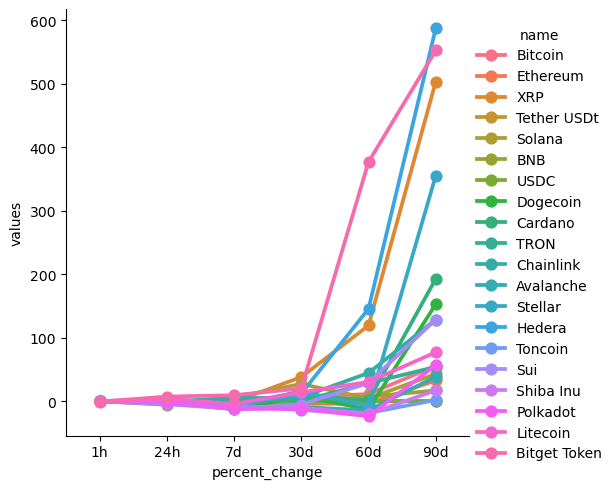

In [111]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [137]:
# If we want to only look at a specific column, like 'Bitcoin', we can do like this:
df10 = df3[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10 

,name,quote.USD.price,timestamp
0,Bitcoin,104381.76604,2025-01-25 10:25:08.948873
20,Bitcoin,104441.56318,2025-01-25 10:26:26.196130
40,Bitcoin,104448.81857,2025-01-25 10:27:26.888490
60,Bitcoin,104308.33353,2025-01-25 12:02:38.060783
80,Bitcoin,104287.80638,2025-01-25 12:03:39.209575
100,Bitcoin,104319.06962,2025-01-25 12:04:55.485500
120,Bitcoin,104324.59043,2025-01-25 12:06:04.891720
140,Bitcoin,104295.70321,2025-01-25 12:07:07.595146


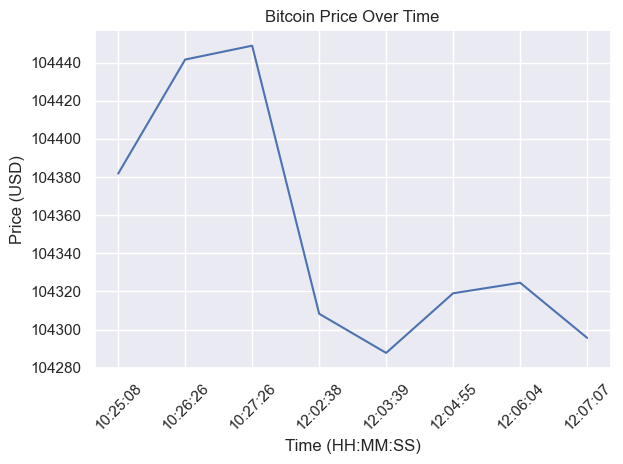

In [149]:
# Ensure the 'timestamp' column is in datetime format
df10['timestamp'] = pd.to_datetime(df10['timestamp'])

# Shorten the timestamp to only show hour, minute, and second
df10['short_timestamp'] = df10['timestamp'].dt.strftime('%H:%M:%S')

sns.set_theme(style='darkgrid')

# Use the shortened timestamp for the x-axis
sns.lineplot(x='short_timestamp', y='quote.USD.price', data=df10)

plt.xlabel('Time (HH:MM:SS)')  
plt.ylabel('Price (USD)')  
plt.title('Bitcoin Price Over Time')  
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusting layout
plt.show()
